In [1]:
from sensor import sensor as sens
from actuator import actuator as act
from threshold import threshold as thr
from manager import manager
from signal_input import signal_input
import wire
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = manager(verbose = True)

#Create an input node
sns = sens(mng,(1,5))
at = act(mng)
#Create threshold nodes
t1 = thr(mng,1)
t2 = thr(mng,1)
t3 = thr(mng,1)
t4 = thr(mng,1)
t5 = thr(mng,2)
t6 = thr(mng,2)
t7 = thr(mng,2)
t8 = thr(mng,2)

In [3]:
sns.inputs

In [4]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t5,0)
t2.add_consumer(t6,0)
t3.add_consumer(t7,0)
t4.add_consumer(t8,0)
t8.add_consumer(at,0)
sns.add_consumer(t1,0,(0,4))
sns.add_consumer(t2,0,(0,3))
sns.add_consumer(t5,0,(0,3))
sns.add_consumer(t3,0,(0,2))
sns.add_consumer(t6,0,(0,2))
sns.add_consumer(t4,0,(0,1))
sns.add_consumer(t7,0,(0,1))
sns.add_consumer(t8,0,(0,0))

In [5]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_IIHQ --> thr_U6Z6 with : wire_4NFS
thr_TJ96 --> thr_H6PS with : wire_QSYH
thr_1AL8 --> thr_VC52 with : wire_XY2X
thr_MS0U --> thr_Q63O with : wire_GQ77
thr_Q63O --> act_GLIH with : wire_HCPD


In [6]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='right2left_movement', directory='right2left', format='png', cleanup=True)

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_GLIH [color=black style=filled shape=doublecircle label="" width=0.30] thr_IIHQ [label ="1"] thr_TJ96 [label ="1"] thr_1AL8 [label ="1"] thr_MS0U [label ="1"] thr_U6Z6 [label ="2"] thr_H6PS [label ="2"] thr_VC52 [label ="2"] thr_Q63O [label ="2"] thr_IIHQ -> thr_U6Z6 [arrowhead="rnormal"] thr_TJ96 -> thr_H6PS [arrowhead="rnormal"] thr_1AL8 -> thr_VC52 [arrowhead="rnormal"] thr_MS0U -> thr_Q63O [arrowhead="rnormal"] thr_Q63O -> act_GLIH [arrowhead="rnormal"] input_DGMK [color=black style=filled shape=circle label="" width=0.25] input_DGMK -> thr_Q63O [arrowhead="rnormal"] input_LL2A [color=black style=filled shape=circle label="" width=0.25] input_LL2A -> thr_MS0U [arrowhead="rnormal"] input_LL2A -> thr_VC52 [arrowhead="rnormal"] input_1DJX [color=black style=filled shape=circle label="" width=0.25] input_1DJX -> thr_1AL8 [arrowhead="rnormal"] input_1DJX -> thr_H6PS [arrowhead="rnormal"] input_QETX [color=black style=filled sh

'right2left\\right2left_movement.png'

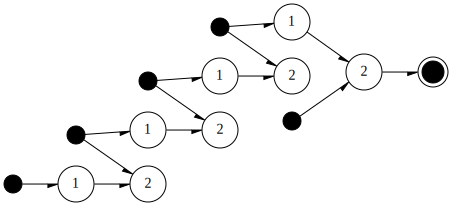

In [7]:
src

In [8]:
movement = [[0,0,0,0,1],
            [0,0,0,1,0],
            [0,0,1,0,0],
            [0,1,0,0,0],
            [1,0,0,0,0]]

In [9]:
for i in range(5):
    sns.feed(movement[i])
    mng.update()

[0, 0, 0, 0, 1]
I : 0
I : 0
I : 0
I : 0
I : 1
signaled
Thresholds at time 0 after the signal: 
[1, 0, 0, 0, 0, 0, 0, 0]
Threshold outputs at time 0
thr_IIHQ --> wire_4NFS
Thresholds at time 0 after threshold update: 
[0, 0, 0, 0, 0, 0, 0, 0]
Wire outputs at time 0
thr_IIHQ --> thr_U6Z6 with : wire_4NFS
thr_TJ96 --- thr_H6PS with : wire_QSYH
thr_1AL8 --- thr_VC52 with : wire_XY2X
thr_MS0U --- thr_Q63O with : wire_GQ77
thr_Q63O --- act_GLIH with : wire_HCPD
Thresholds at time 0 after wire update: 
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0]
I : 0
I : 0
I : 0
I : 1
signaled
Thresholds at time 1 after the signal: 
[0, 1, 0, 0, 2, 0, 0, 0]
I : 0
Threshold outputs at time 1
thr_TJ96 --> wire_QSYH
Thresholds at time 1 after threshold update: 
[0, 0, 0, 0, 0, 0, 0, 0]
Wire outputs at time 1
thr_IIHQ --- thr_U6Z6 with : wire_4NFS
thr_TJ96 --> thr_H6PS with : wire_QSYH
thr_1AL8 --- thr_VC52 with : wire_XY2X
thr_MS0U --- thr_Q63O with : wire_GQ77
thr_Q63O --- act_GLIH with : wire_HCPD
Thresholds at 